In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import scipy.io.wavfile
from scipy import fftpack
import pydub
from pydub.playback import play
import math

In [2]:
def dct1D(vector):
    N = len(vector)
    X = np.zeros(N)
    for k in range(N):
        CK = math.sqrt(1.0/N) if k == 0 else math.sqrt(2.0/N)
        sum = 0
        for n in range(N):
            f1 = ((2*(3.141592653589)*k*n)/2*N)
            f2 = ((k*(3.141592653589))/2*N)
            sum += vector[n] * math.cos(f1+f2)
            #sum += vector[n] * math.cos(((2*math.pi*k*n)/2*N)+((k*math.pi)/2*N))
        X[k] = CK * sum

    return X

In [3]:
# CalculaIDCT

In [4]:
def idct1D(vector):

    N = len(vector)
    x = np.zeros(N)

    for n in range(N):
        sum = 0
        for k in range(N):
            f1 = ((2*(3.141592653589)*k*n)/2*N)
            f2 = ((k*(3.141592653589))/2*N)
            CK = math.sqrt(1.0/N) if k == 0 else math.sqrt(2.0/N)
            sum += vector[n] * math.cos(f1+f2)
            sum += CK * vector[k] * math.cos((f1)+(f2))
            #sum += alpha * vector[k] * math.cos( (math.pi * (2*n+1) * k) / (2*N) )
        x[n] = sum

    return x

# Função para plotagem do gráfico com a DCT Filtrada

In [5]:
def plotaDCTs(dct, dctFiltrada):
    plt.figure('Domínio da Frequência')
    plt.subplot(211)
    plt.plot(dct, linewidth=0.1, alpha=1.0, color='blue')
    plt.ylabel('Frequencia')
    plt.subplot(212)
    plt.plot(dctFiltrada, linewidth=0.1, alpha=1.0, color='blue')
    plt.ylabel('Frequencia')
    plt.show()

In [6]:
def desenhaGrafico (data):
    plt.figure('Data')
    plt.plot(data, linewidth=0.1, alpha=1,color='red')
    plt.ylabel('Amplitude')
    plt.show()

# DCTAudio

/home/lucasnn/.local/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


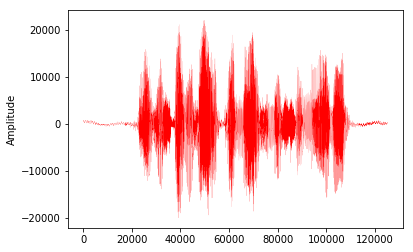

In [7]:
rate, audioData = scipy.io.wavfile.read("audio.wav")
desenhaGrafico (audioData)

In [14]:
DCT = dct1D(audioData)

#DCT = fftpack.dct(audioData, norm = 'ortho') #Calcula a Transformada Discreta


#print (DCT)
dctFiltrada = DCT.copy()
# print (dctFiltrada)

KeyboardInterrupt: 

In [9]:
listaComDCT = dctFiltrada.tolist() #Cria uma lista com os valores resultantes da Transformada Discreta
#print(listaComDCT)
Indices = []

#Percorre todo o array e troca os valores pelo seu módulo
for i in range(0, len(listaComDCT)):
    listaComDCT[i] = abs(listaComDCT[i])
    aux = listaComDCT.copy()

#print(listaComDCT)

In [11]:
numero_de_frequencias_desejadas = int(input("Digite o numero de frequencias desejadas"))

Digite o numero de frequencias desejadas12


In [12]:
#Adiciona na lista os n índices de maior valor, com n = numero de amostras
for i in range(0,numero_de_frequencias_desejadas):
    Indices.append(listaComDCT.index(max(aux)))
    indiceAux = aux.index(max(aux))
    aux.pop(indiceAux)

    # dctFiltrada = DCT.copy()

print(Indices)

[3749, 3756, 3668, 3750, 3744, 3777, 3641, 3740, 3697, 1605, 3839, 3699]


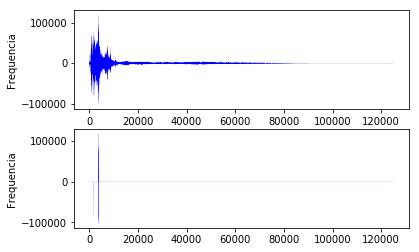

In [13]:
#Preserva os DCT's de tamanho igual aos da lista de IndiceMaximo verificando se eles estão na lista e zera os demais
for i in range(0, len(dctFiltrada)):
    if i not in Indices:
        dctFiltrada[i] = 0

dctFiltrada = np.asarray(dctFiltrada)

AudioTransformado = fftpack.idct(DCT, norm = 'ortho')
AudioTransformado = AudioTransformado.astype("int16")
scipy.io.wavfile.write("audioTransformado.wav", rate, AudioTransformado)

AudioTransformadoImportantes = fftpack.idct(dctFiltrada, norm = 'ortho')
AudioTransformadoImportantes = AudioTransformadoImportantes.astype("int16")
scipy.io.wavfile.write("AudioTransformadoImportantes.wav", rate, AudioTransformadoImportantes)

plotaDCTs(DCT, dctFiltrada)